In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import fitsio
import glob
import pandas as pd

In [2]:
summary_everest = pd.read_csv("summary_entropy_everest.csv")
summary_fuji = pd.read_csv("summary_entropy_fuji.csv")

summary_everest['TILEPETALID'] = summary_everest['TILEID']*1000000 + summary_everest['PETALID']
summary_fuji['TILEPETALID'] = summary_fuji['TILEID']*1000000 + summary_fuji['PETALID']

is_fuji_sv3 = (summary_fuji['SURVEY']=='sv3') & (summary_fuji['PROGRAM']!='backup')
tiles_fuji_sv3 = np.array(list(set(summary_fuji['TILEID'][is_fuji_sv3])))

is_tile_sv3 = np.isin(summary_everest['TILEID'], tiles_fuji_sv3)
summary_everest = summary_everest[is_tile_sv3]

is_tile_sv3 = np.isin(summary_fuji['TILEID'], tiles_fuji_sv3)
summary_fuji = summary_fuji[is_tile_sv3]

In [3]:
summary_everest = summary_everest.sort_values(by=['TILEPETALID'])
summary_fuji = summary_fuji.sort_values(by=['TILEPETALID'])

In [4]:
dd = np.array(summary_everest['TILEID']) - np.array(summary_fuji['TILEID'])
np.count_nonzero(dd!=0), np.count_nonzero(dd==0), len(dd), len(summary_fuji), len(summary_fuji['TILEID'])

(0, 4528, 4528, 4528, 4528)

In [5]:
dd = np.array(summary_everest['PETALID']) - np.array(summary_fuji['PETALID'])
np.count_nonzero(dd!=0), np.count_nonzero(dd==0), len(dd), len(summary_fuji), len(summary_fuji['TILEID'])

(0, 4528, 4528, 4528, 4528)

In [6]:
set(summary_everest['PROGRAM'])

{'bright', 'dark'}

In [7]:
summary_fuji

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z,TILEPETALID
2055,1,dark,sv3,20210406,0,0.991404,275,15,84,374,1000000
2056,1,dark,sv3,20210406,1,0.989543,241,12,71,324,1000001
2057,1,dark,sv3,20210406,2,0.994416,256,14,87,357,1000002
2058,1,dark,sv3,20210406,3,0.992104,222,14,85,321,1000003
2059,1,dark,sv3,20210406,4,0.988611,228,17,84,329,1000004
...,...,...,...,...,...,...,...,...,...,...,...
7188,595,bright,sv3,20210529,5,0.992240,181,203,2,386,595000005
7189,595,bright,sv3,20210529,6,0.989277,154,194,3,351,595000006
7190,595,bright,sv3,20210529,7,0.992467,136,203,4,343,595000007
7191,595,bright,sv3,20210529,8,0.987551,184,218,4,406,595000008


In [8]:
summary_everest

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z,TILEPETALID
0,1,dark,sv3,20210406,0,0.991434,274,14,81,369,1000000
1,1,dark,sv3,20210406,1,0.990549,249,11,69,329,1000001
2,1,dark,sv3,20210406,2,0.993684,256,14,86,356,1000002
3,1,dark,sv3,20210406,3,0.992672,222,13,85,320,1000003
4,1,dark,sv3,20210406,4,0.990598,230,19,85,334,1000004
...,...,...,...,...,...,...,...,...,...,...,...
4863,595,bright,sv3,20210529,5,0.989971,181,211,2,394,595000005
4864,595,bright,sv3,20210529,6,0.987793,152,194,4,350,595000006
4865,595,bright,sv3,20210529,7,0.991941,138,202,3,343,595000007
4866,595,bright,sv3,20210529,8,0.988236,188,219,4,411,595000008


In [ ]:
plt.scatter(summary_fuji['H'], summary_everest['H'], alpha=0.1)
x = np.linspace(0.95,1.0, 100)
plt.plot(x,x)
plt.xlim(0.95,1.0)
plt.ylim(0.95,1.0)

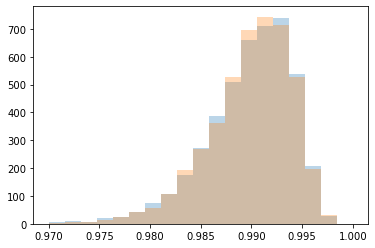

In [9]:
_ = plt.hist(summary_everest['H'], bins=np.linspace(0.97,1.0,20), alpha=.3)
_ = plt.hist(summary_fuji['H'], bins=np.linspace(0.97,1.0,20), alpha=0.3)


#x = np.linspace(0.95,1.0, 100)
#plt.xlim(0.95,1.0)
#plt.ylim(0.95,1.0)

In [10]:
summary_fuji[summary_fuji['H']<0.970]

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z,TILEPETALID
4834,8,dark,sv3,20210430,9,0.960568,268,13,20,301,8000009
4192,169,dark,sv3,20210419,7,0.965899,204,11,35,250,169000007
2686,247,dark,sv3,20210409,1,0.959129,242,8,36,286,247000001
3772,250,dark,sv3,20210416,7,0.969507,203,8,34,245,250000007
5161,280,dark,sv3,20210502,7,0.969503,176,19,15,210,280000007
4042,333,dark,sv3,20210417,7,0.956209,191,10,22,223,333000007
3074,357,dark,sv3,20210411,9,0.968465,208,13,39,260,357000009
5152,511,dark,sv3,20210502,7,0.966178,189,20,52,261,511000007


In [11]:
summary_everest[summary_everest['H']<0.970]

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z,TILEPETALID
79,8,dark,sv3,20210430,9,0.968811,270,12,22,304,8000009
296,34,dark,sv3,20210504,6,0.965879,232,12,26,270,34000006
1103,119,dark,sv3,20210504,3,0.967881,175,10,10,195,119000003
1343,146,dark,sv3,20210504,3,0.968492,170,13,7,190,146000003
2221,247,dark,sv3,20210409,1,0.962326,243,8,35,286,247000001
2506,280,dark,sv3,20210502,7,0.969988,172,18,14,204,280000007
2696,305,dark,sv3,20210416,7,0.969335,212,11,22,245,305000007
2791,315,bright,sv3,20210428,2,0.862385,18,28,1,47,315000002
2794,315,bright,sv3,20210428,5,0.947698,38,40,0,78,315000005


7.707806363531407e-05 0.11721183483717368


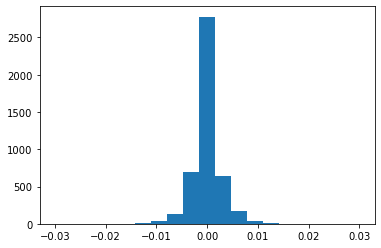

In [12]:
delta_h = np.array(summary_fuji['H']) - np.array(summary_everest['H'])
_ = plt.hist(delta_h, bins=np.linspace(-0.03,0.03,20))
print(np.mean(delta_h), np.max(delta_h))

-1.437279151943463


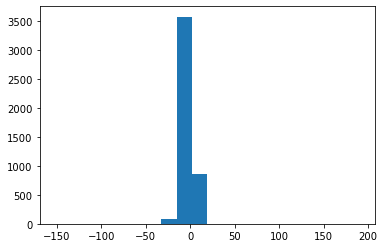

In [13]:
delta_n = np.array(summary_fuji['N_GAL']) - np.array(summary_everest['N_GAL'])
_ = plt.hist(delta_n, bins=20)
print(np.mean(delta_n))

-0.11947879858657244


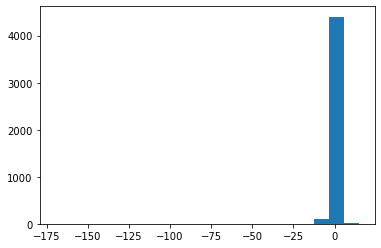

In [14]:
delta_n = np.array(summary_fuji['N_QSO']) - np.array(summary_everest['N_QSO'])
_ = plt.hist(delta_n, bins=20)
print(np.mean(delta_n))

-0.03975265017667844


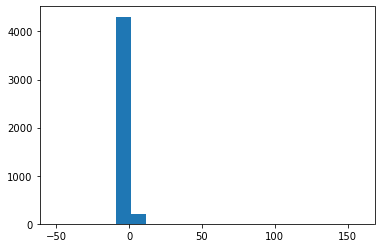

In [15]:
delta_n = np.array(summary_fuji['N_STAR']) - np.array(summary_everest['N_STAR'])
_ = plt.hist(delta_n, bins=20)
print(np.mean(delta_n))

In [16]:
delta_n

array([ 1,  1,  0, ...,  1, -1,  1])

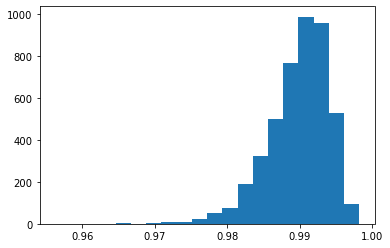

In [17]:
_ = plt.hist(summary_fuji['H'], bins=20)

In [18]:
ii = summary_everest['H']<0.975
print(np.count_nonzero(ii))
summary_everest[ii].sort_values(by=['H'])

34


,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z,TILEPETALID
2791,315,bright,sv3,20210428,2,0.862385,18,28,1,47,315000002
2794,315,bright,sv3,20210428,5,0.947698,38,40,0,78,315000005
2221,247,dark,sv3,20210409,1,0.962326,243,8,35,286,247000001
296,34,dark,sv3,20210504,6,0.965879,232,12,26,270,34000006
1103,119,dark,sv3,20210504,3,0.967881,175,10,10,195,119000003
1343,146,dark,sv3,20210504,3,0.968492,170,13,7,190,146000003
79,8,dark,sv3,20210430,9,0.968811,270,12,22,304,8000009
2696,305,dark,sv3,20210416,7,0.969335,212,11,22,245,305000007
2506,280,dark,sv3,20210502,7,0.969988,172,18,14,204,280000007
2946,333,dark,sv3,20210417,7,0.970885,198,10,22,230,333000007


In [19]:
ii = summary_fuji['H']<0.975
print(np.count_nonzero(ii))
summary_fuji[ii].sort_values(by=['H'])

# para recordar
# https://data.desi.lbl.gov/desi/spectro/redux/fuji/tiles/cumulative/39/20210405/tile-qa-39-thru20210405.png PETAL 7

23


,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z,TILEPETALID
4042,333,dark,sv3,20210417,7,0.956209,191,10,22,223,333000007
2686,247,dark,sv3,20210409,1,0.959129,242,8,36,286,247000001
4834,8,dark,sv3,20210430,9,0.960568,268,13,20,301,8000009
4192,169,dark,sv3,20210419,7,0.965899,204,11,35,250,169000007
5152,511,dark,sv3,20210502,7,0.966178,189,20,52,261,511000007
3074,357,dark,sv3,20210411,9,0.968465,208,13,39,260,357000009
5161,280,dark,sv3,20210502,7,0.969503,176,19,15,210,280000007
3772,250,dark,sv3,20210416,7,0.969507,203,8,34,245,250000007
5269,281,dark,sv3,20210503,5,0.971116,97,10,6,113,281000005
5500,146,dark,sv3,20210504,6,0.971168,193,15,10,218,146000006


In [20]:
summary_guadalupe = pd.read_csv("summary_entropy_guadalupe.csv")

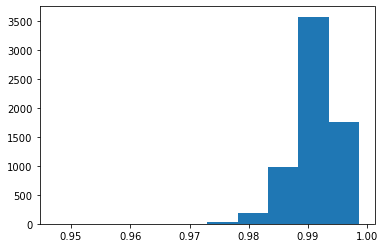

In [21]:
_ = plt.hist(summary_guadalupe['H'], bins=10)

In [22]:
ii = summary_guadalupe['H']<0.975
print(np.count_nonzero(ii))
summary_guadalupe[ii].sort_values(by=['H'])

16


,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z
6402,2996,dark,main,20210708,2,0.947277,84,10,11,105
4345,20411,bright,main,20210617,5,0.960139,100,34,2,136
6361,1842,dark,main,20210708,1,0.962167,121,13,39,173
6431,20420,bright,main,20210708,1,0.962813,158,36,2,196
2777,1394,dark,main,20210606,7,0.964500,93,18,39,150
6081,2997,dark,main,20210705,1,0.965210,107,31,29,167
6381,2977,dark,main,20210708,1,0.965652,137,12,24,173
6461,80980,bright,special,20210708,1,0.966557,104,14,0,118
6221,20878,bright,main,20210706,1,0.969118,141,48,4,193
6171,2968,dark,main,20210705,1,0.969309,104,22,27,153


In [23]:
# para recordar de guadalupe
# https://data.desi.lbl.gov/desi/spectro/redux/guadalupe/tiles/cumulative/2996/20210708/tile-qa-2996-thru20210708.png
# https://data.desi.lbl.gov/desi/spectro/redux/guadalupe/tiles/cumulative/20411/20210617/tile-qa-20411-thru20210617.png

# para ver que pasa
# bright star en el petal 7 que es el sospechoso
#https://data.desi.lbl.gov/desi/spectro/redux/guadalupe/tiles/cumulative/1765/20210515/tile-qa-1765-thru20210515.png

# mal posicionamiento sobre todo el petalo 7
#https://data.desi.lbl.gov/desi/spectro/redux/guadalupe/tiles/cumulative/2204/20210519/tile-qa-2204-thru20210519.png

In [24]:
summary_daily = pd.read_csv("summary_entropy_daily.csv")
ii = (summary_daily['PROGRAM']!='backup') & (summary_daily['SURVEY']!='special')
summary_daily = summary_daily[ii]

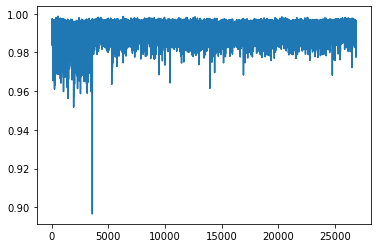

In [25]:
plt.plot(summary_daily['H'])

In [29]:
#plt.scatter(summary_daily['LASTNIGHT'], summary_daily['H'])

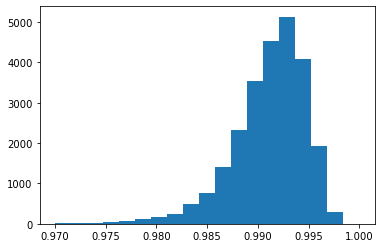

In [30]:
_ = plt.hist(summary_daily['H'], bins=np.linspace(0.97,1.0,20))

In [31]:
jj = (summary_daily['H']<0.970) & (summary_daily['N_GOOD_Z']>210)
summary_daily[jj]

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z
5295,21047,bright,main,20211026,5,0.963522,196,26,3,225
9457,8400,dark,main,20211110,7,0.968443,251,31,50,332
14384,5645,dark,main,20211205,4,0.969532,231,16,85,332


In [32]:
summary_daily[summary_daily['TILEID']==3147]

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z
24507,3147,dark,main,20220210,0,0.991542,295,16,79,390
24508,3147,dark,main,20220210,1,0.987660,260,17,57,334
24509,3147,dark,main,20220210,2,0.989939,319,15,53,387
24510,3147,dark,main,20220210,3,0.990615,275,13,74,362
24511,3147,dark,main,20220210,4,0.990680,278,15,57,350
24512,3147,dark,main,20220210,5,0.994307,264,18,64,346
24513,3147,dark,main,20220210,6,0.993042,313,12,49,374
24514,3147,dark,main,20220210,7,0.986868,262,11,39,312
24515,3147,dark,main,20220210,8,0.987296,315,13,42,370
24516,3147,dark,main,20220210,9,0.991894,314,12,50,376


In [33]:
summary_daily[summary_daily['TILEID']==8801]

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z
26357,8801,dark,main,20220219,0,0.985875,320,23,32,375
26358,8801,dark,main,20220219,1,0.990736,299,19,42,360
26359,8801,dark,main,20220219,2,0.989305,311,18,51,380
26360,8801,dark,main,20220219,3,0.990954,301,24,46,371
26361,8801,dark,main,20220219,4,0.990381,300,15,37,352
26362,8801,dark,main,20220219,5,0.993315,303,13,49,365
26363,8801,dark,main,20220219,6,0.991961,312,17,51,380
26364,8801,dark,main,20220219,7,0.995823,271,14,39,324
26365,8801,dark,main,20220219,8,0.995285,310,15,52,377
26366,8801,dark,main,20220219,9,0.986905,318,20,39,377


In [34]:
summary_daily[summary_daily['TILEID']==11566]

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z
26407,11566,dark,main,20220219,0,0.994729,285,20,89,394
26408,11566,dark,main,20220219,1,0.990907,257,15,75,347
26409,11566,dark,main,20220219,2,0.992132,290,15,75,380
26410,11566,dark,main,20220219,3,0.993608,270,10,75,355
26411,11566,dark,main,20220219,4,0.990448,259,13,76,348
26412,11566,dark,main,20220219,5,0.989604,272,12,83,367
26413,11566,dark,main,20220219,6,0.995549,278,13,94,385
26414,11566,dark,main,20220219,7,0.992470,237,10,78,325
26415,11566,dark,main,20220219,8,0.993464,281,13,85,379
26416,11566,dark,main,20220219,9,0.988753,285,19,79,383


In [35]:
summary_daily[summary_daily['TILEID']==21576]

,TILEID,PROGRAM,SURVEY,LASTNIGHT,PETALID,H,N_GAL,N_STAR,N_QSO,N_GOOD_Z
19650,21576,bright,main,20220113,0,0.994962,299,104,5,408
19651,21576,bright,main,20220113,1,0.992963,280,98,10,388
19652,21576,bright,main,20220113,2,0.987878,233,169,9,411
19653,21576,bright,main,20220113,3,0.996700,263,120,4,387
19654,21576,bright,main,20220113,4,0.989924,233,136,6,375
19655,21576,bright,main,20220113,5,0.987781,254,128,3,385
19656,21576,bright,main,20220113,6,0.976949,314,81,6,401
19657,21576,bright,main,20220113,7,0.992422,287,67,3,357
19658,21576,bright,main,20220113,8,0.996377,290,97,5,392
19659,21576,bright,main,20220113,9,0.992768,292,114,4,410


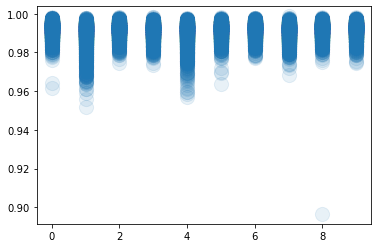

In [36]:
plt.scatter(summary_daily['PETALID'], summary_daily['H'], s=200, alpha=0.1)

In [38]:
def compute_entropy_1d(x):
    n_steps = len(x) - 3
    proba = {}
    for i in range(n_steps):
        d = x[i:i+4]
        l = list(np.argsort(d))
        l = ''.join(str(e) for e in l)
        try:
            proba[l] += 1
        except:
            proba[l] = 1
    p = np.array(list(proba.values()))
    p = p/p.sum()
    h = np.sum(-p*np.log2(p))/np.log2(24)
    return h

In [ ]:
n_side = np.int_(np.linspace(100,450,20))
fractions = np.zeros(len(n_side))

for j in range(len(n_side)):
    n_iterations = 20000
    H_gaussian = np.zeros(n_iterations)
    for i in range(n_iterations):
        x = np.random.normal(size=n_side[j])
        H_gaussian[i] = compute_entropy_1d(x)
    fractions[j] = np.percentile(H_gaussian,1)

In [ ]:
plt.scatter(summary_daily['N_GOOD_Z'], summary_daily['H'], alpha=0.1)
plt.plot(n_side, fractions, color='red')
plt.ylim([0.92,1.00])

In [ ]:
n_side

In [ ]:
fractions